### Used Car Price Prediction 

#### Import Libraries 

In [141]:
# !pip3 install xgboost

In [142]:
# !pip3 install wordcloud

In [143]:
# !pip3 install plotly

In [144]:
# !pip3 install jupyterthemes

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  #interactive data visualization
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai',context='notebook',ticks=True,grid=False)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot   #offline version of plotly

#### Load Data 

In [146]:
car_df = pd.read_csv("cars_data.csv")

In [147]:
car_df.head()

Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  $36,945  $33,337   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820  $21,761   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990  $24,647   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195  $30,299   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755  $39,014   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0         265        17           23    4451   
1         2.0        4.0         200        24           31    2778   
2         2.4        4.0         200        22           29    3230   
3         3.2        6.0         270        20           28    3575   
4         3.5        6.0         225        18           24    3880   

   Wheelbase  Length  
0        106     189  
1        101     172  
2        105     183  
3        108     186  
4        115     197

In [148]:
car_df.tail()

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
423  $38,203         2.4        5.0         197        21           28   
424  $40,083         2.3        5.0         242        20           26   
425  $42,573         2.9        6.0         268        19           26   
426  $24,641         1.9        4.0         170        22           29   
427  $33,112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  
423    3450        105     186  
424    3450        105     186  
425    3653        110     190  
426    2822        101     180  
427    3823        109     186

In [149]:
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [150]:
car_df.shape

(428, 15)

#### Check Missing Values 

In [151]:
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

Since there are only two records so we'll drop them.

In [152]:
car_df = car_df.dropna()

In [153]:
car_df.shape

(426, 15)

In [154]:
car_df.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [155]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    object 
 6   Invoice      426 non-null    object 
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 53.2+ KB


#### Clean MSRP and Invoice column 

In [156]:
car_df['MSRP'] = car_df['MSRP'].str.replace('$','')
car_df['MSRP'] = car_df['MSRP'].str.replace(',','')
car_df['MSRP'] = car_df['MSRP'].astype(int)

In [157]:
car_df['Invoice'] = car_df['Invoice'].str.replace('$','')
car_df['Invoice'] = car_df['Invoice'].str.replace(',','')
car_df['Invoice'] = car_df['Invoice'].astype(int)

In [158]:
car_df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [159]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         426 non-null    object 
 1   Model        426 non-null    object 
 2   Type         426 non-null    object 
 3   Origin       426 non-null    object 
 4   DriveTrain   426 non-null    object 
 5   MSRP         426 non-null    int32  
 6   Invoice      426 non-null    int32  
 7   EngineSize   426 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   426 non-null    int64  
 10  MPG_City     426 non-null    int64  
 11  MPG_Highway  426 non-null    int64  
 12  Weight       426 non-null    int64  
 13  Wheelbase    426 non-null    int64  
 14  Length       426 non-null    int64  
dtypes: float64(2), int32(2), int64(6), object(5)
memory usage: 49.9+ KB


In [160]:
car_df.describe()

MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     426.000000     426.000000  426.000000  426.000000  426.000000   
mean    32804.549296   30040.654930    3.205634    5.807512  215.877934   
std     19472.460825   17679.430122    1.103520    1.558443   71.991040   
min     10280.000000    9875.000000    1.400000    3.000000   73.000000   
25%     20324.750000   18836.000000    2.400000    4.000000  165.000000   
50%     27807.500000   25521.500000    3.000000    6.000000  210.000000   
75%     39225.000000   35754.750000    3.900000    6.000000  255.000000   
max    192465.000000  173560.000000    8.300000   12.000000  500.000000   

         MPG_City  MPG_Highway       Weight   Wheelbase      Length  
count  426.000000   426.000000   426.000000  426.000000  426.000000  
mean    20.070423    26.854460  3580.474178  108.164319  186.420188  
std      5.248616     5.752335   759.870073    8.330030   14.366611  
min     10.000000    12.000000  1850.000000   89.000000  143.000000  
25%     17.000000    24.000000  3111.250000  103.000000  178.000000  
50%     19.000000    26.000000  3476.000000  107.000000  187.000000  
75%     21.750000    29.000000  3979.250000  112.000000  194.000000  
max     60.000000    66.000000  7190.000000  144.000000  238.000000

#### Perform Data Visualization 

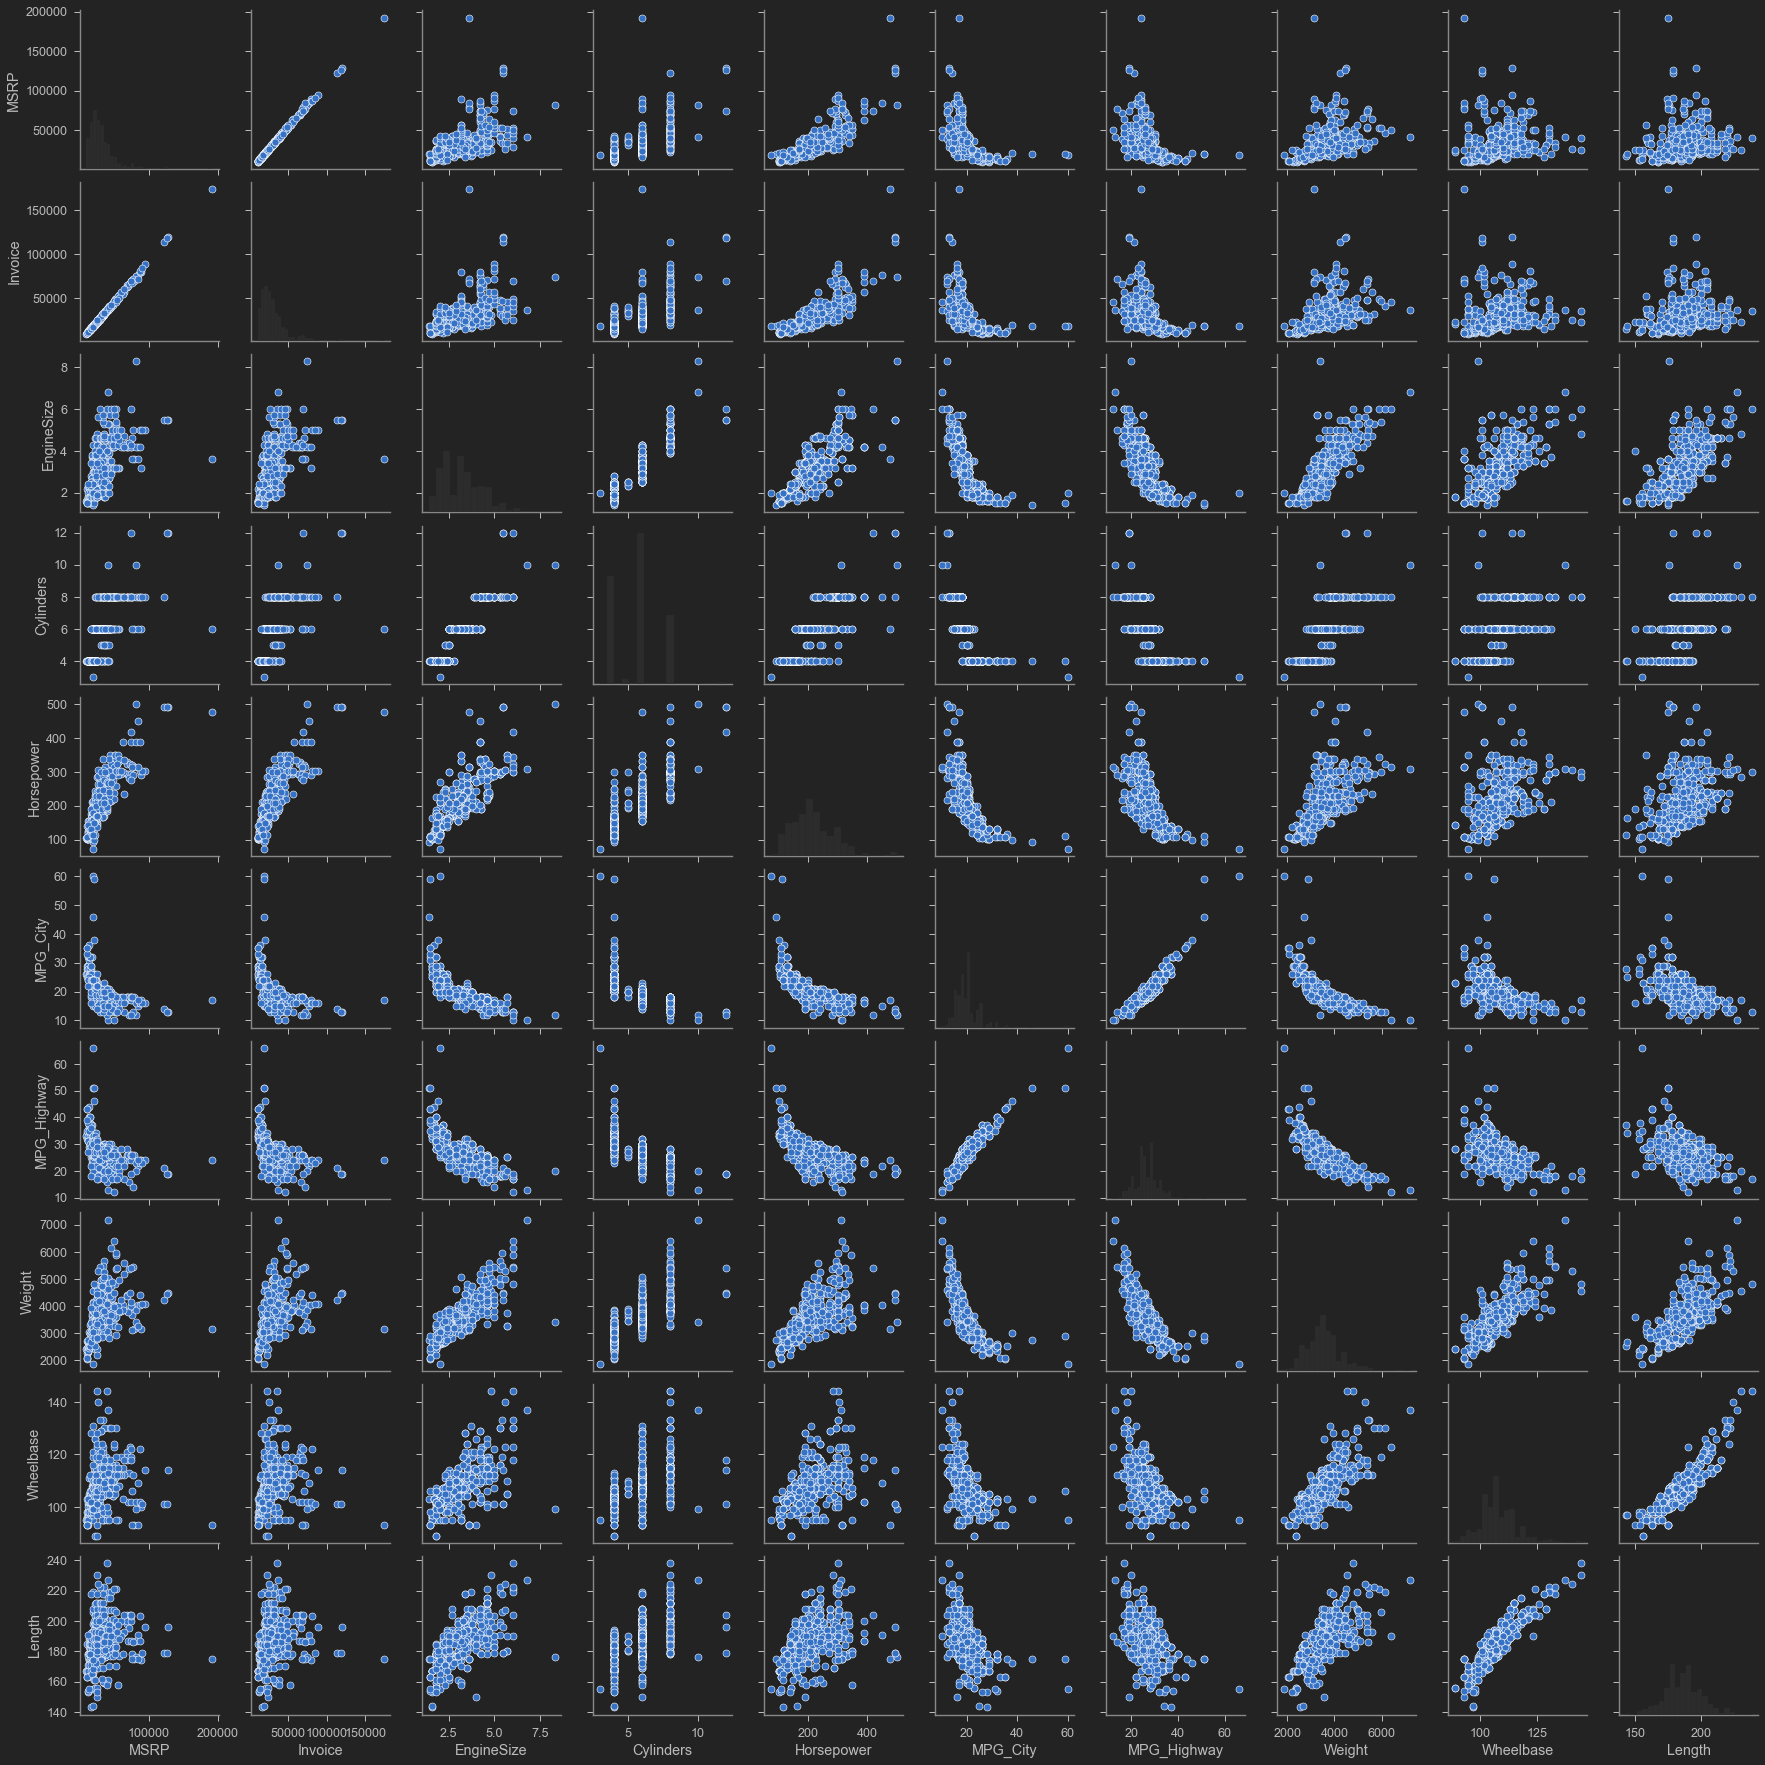

In [161]:
# Scatterplots for joint relationshipas and histograms for univariate distributions

sns.pairplot(car_df)

In [162]:
car_df.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [163]:
# Lets view various make of cars

car_df['Make'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [164]:
fig = px.histogram(car_df,x="Make",labels={"Make":"Manufacturer"},
                  title = "Make of the Car",
                  color_discrete_sequence=["maroon"])
fig.show()

In [165]:
# Type of cars

car_df['Type'].unique()

array(['SUV', 'Sedan', 'Sports', 'Wagon', 'Truck', 'Hybrid'], dtype=object)

In [166]:
fig = px.histogram(car_df,x="Type",labels={"Type":"Type"},
                  title = "Type of the Car",
                  color_discrete_sequence=["blue"])
fig.show()

In [167]:
# Origin of cars

car_df['Origin'].unique()

array(['Asia', 'Europe', 'USA'], dtype=object)

In [168]:
fig = px.histogram(car_df,x="Origin",labels={"Origin":"Origin"},
                  title = "Origin of the Car",
                  color_discrete_sequence=["brown"])
fig.show()

In [169]:
# DriveTrain of cars

car_df['DriveTrain'].unique()

array(['All', 'Front', 'Rear'], dtype=object)

In [170]:
fig = px.histogram(car_df,x="DriveTrain",labels={"DriveTrain":"DriveTrain"},
                  title = "DriveTrain of the Car",
                  color_discrete_sequence=["black"])
fig.show()

In [171]:
# Plot the make of the car and its origin

fig = px.histogram(car_df, x = "Make",
                  color = "Origin",
                  labels = {"Make":"Manufacturer"},
                  title = "Make of the Car vs Origin")
fig.show()

In [172]:
# Historgram of Make and Type of the car

fig = px.histogram(car_df,x='Make',
                  color='Type',
                  labels = {'Make':'Manufacturer'},
                  title = 'Make of the Car vs. Type')
fig.show()

#### Visualizing text data 

In [173]:
# lets view the model of used cars used wordcloud generator

from wordcloud import WordCloud, STOPWORDS

In [174]:
car_df.head()

Make           Model   Type Origin DriveTrain   MSRP  Invoice  EngineSize  \
0  Acura             MDX    SUV   Asia        All  36945    33337         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820    21761         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990    24647         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  33195    30299         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755    39014         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [175]:
text = car_df.Model.values
text

array(['MDX', 'RSX Type S 2dr', 'TSX 4dr', 'TL 4dr', '3.5 RL 4dr',
       '3.5 RL w/Navigation 4dr', 'NSX coupe 2dr manual S', 'A4 1.8T 4dr',
       'A41.8T convertible 2dr', 'A4 3.0 4dr',
       'A4 3.0 Quattro 4dr manual', 'A4 3.0 Quattro 4dr auto',
       'A6 3.0 4dr', 'A6 3.0 Quattro 4dr', 'A4 3.0 convertible 2dr',
       'A4 3.0 Quattro convertible 2dr', 'A6 2.7 Turbo Quattro 4dr',
       'A6 4.2 Quattro 4dr', 'A8 L Quattro 4dr', 'S4 Quattro 4dr',
       'RS 6 4dr', 'TT 1.8 convertible 2dr (coupe)',
       'TT 1.8 Quattro 2dr (convertible)',
       'TT 3.2 coupe 2dr (convertible)', 'A6 3.0 Avant Quattro',
       'S4 Avant Quattro', 'X3 3.0i', 'X5 4.4i', '325i 4dr', '325Ci 2dr',
       '325Ci convertible 2dr', '325xi 4dr', '330i 4dr', '330Ci 2dr',
       '330xi 4dr', '525i 4dr', '330Ci convertible 2dr', '530i 4dr',
       '545iA 4dr', '745i 4dr', '745Li 4dr', 'M3 coupe 2dr',
       'M3 convertible 2dr', 'Z4 convertible 2.5i 2dr',
       'Z4 convertible 3.0i 2dr', '325xi Sport', 'Ra

In [176]:
stopwords = set(STOPWORDS)

In [177]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [178]:
wc = WordCloud(background_color="black",max_words=2000,max_font_size=100, random_state=123,
              stopwords=stopwords, contour_width=3).generate(str(text))

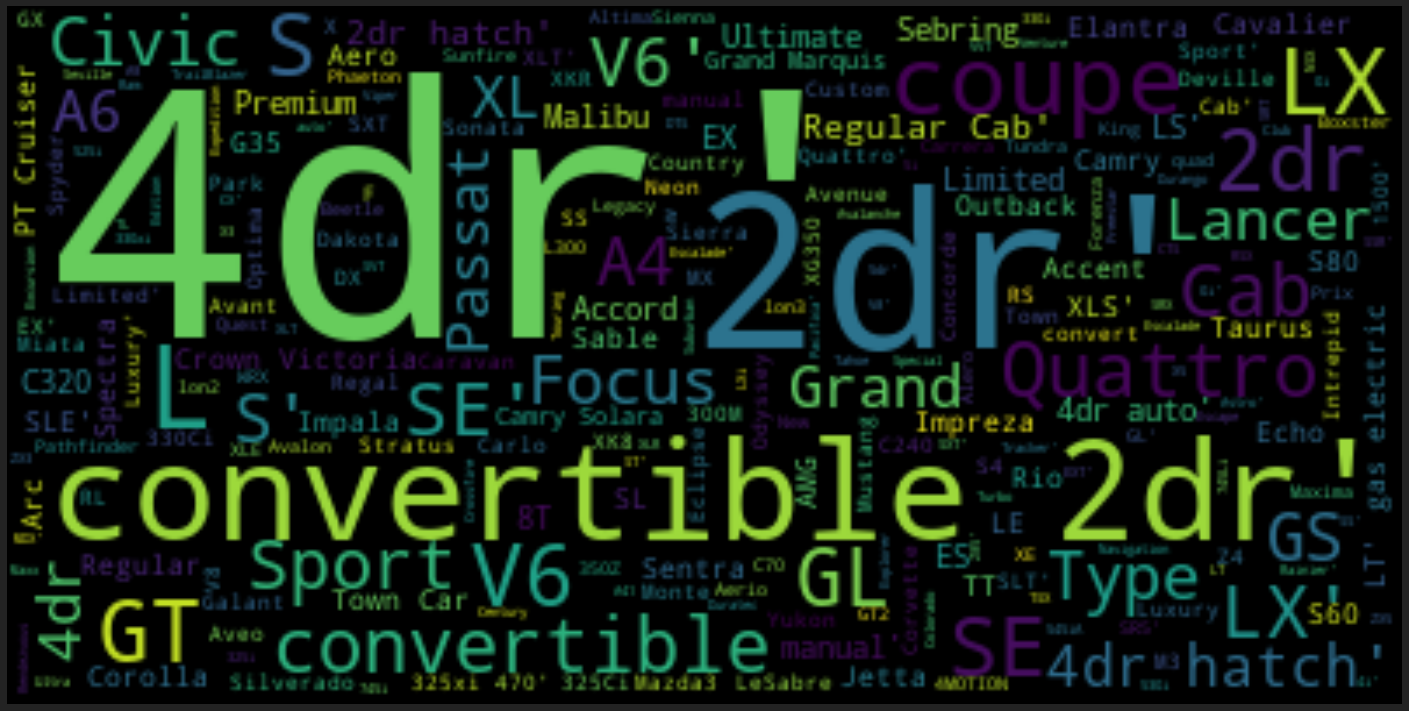

In [179]:
fig = plt.figure(figsize=(25,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()

From the wordcloud we can infer that 4dr, 2dr, convertible, sport, grand, Lancer, Civic, GS are some of the most frequently occuring words in our Model column.

In [180]:
# Obtain the correlation
car_df.corr()

MSRP   Invoice  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000  0.999132    0.573238   0.649742    0.827296 -0.475916   
Invoice      0.999132  1.000000    0.566019   0.645226    0.824079 -0.471304   
EngineSize   0.573238  0.566019    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742  0.645226    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296  0.824079    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916 -0.471304   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523 -0.435452   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987  0.441916    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665  0.148003    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060  0.165645    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
Invoice        -0.435452  0.441916   0.148003  0.165645  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

<AxesSubplot:>

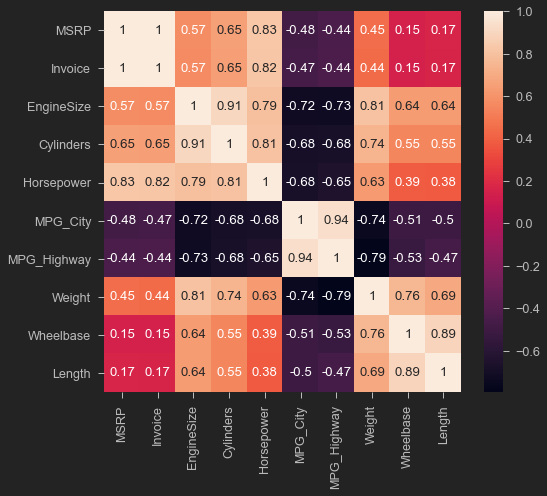

In [181]:
sns.heatmap(car_df.corr(),annot=True)

From the correlation heatmap or matrix, we can infer that MSRP is highly positively correlated with Horsepower, Cylinders and EngineSize. Also since Invoice is perfectly correlated with MSRP so it means we don't need this feature for our prediction.

#### Prepare data for Modeling

In [182]:
# Perform one-hot encoding for Make, Model, Type, Origin, and Drivetrain as they are categorical features.
df_dum = pd.get_dummies(car_df,columns=['Make','Model','Type','Origin','DriveTrain'])

In [183]:
df_dum

MSRP  Invoice  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  \
0    36945    33337         3.5        6.0         265        17           23   
1    23820    21761         2.0        4.0         200        24           31   
2    26990    24647         2.4        4.0         200        22           29   
3    33195    30299         3.2        6.0         270        20           28   
4    43755    39014         3.5        6.0         225        18           24   
..     ...      ...         ...        ...         ...       ...          ...   
423  40565    38203         2.4        5.0         197        21           28   
424  42565    40083         2.3        5.0         242        20           26   
425  45210    42573         2.9        6.0         268        19           26   
426  26135    24641         1.9        4.0         170        22           29   
427  35145    33112         2.5        5.0         208        20           27   

     Weight  Wheelbase  Length  ...  Type_Sedan  Type_Sports  Type_Truck  \
0      4451        106     189  ...           0            0           0   
1      2778        101     172  ...           1            0           0   
2      3230        105     183  ...           1            0           0   
3      3575        108     186  ...           1            0           0   
4      3880        115     197  ...           1            0           0   
..      ...        ...     ...  ...         ...          ...         ...   
423    3450        105     186  ...           1            0           0   
424    3450        105     186  ...           1            0           0   
425    3653        110     190  ...           1            0           0   
426    2822        101     180  ...           0            0           0   
427    3823        109     186  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 483 columns]

In [184]:
# Drop Invoice feature
df_data = df_dum.drop(['Invoice'],axis=1)

In [185]:
df_data

MSRP  EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0    36945         3.5        6.0         265        17           23    4451   
1    23820         2.0        4.0         200        24           31    2778   
2    26990         2.4        4.0         200        22           29    3230   
3    33195         3.2        6.0         270        20           28    3575   
4    43755         3.5        6.0         225        18           24    3880   
..     ...         ...        ...         ...       ...          ...     ...   
423  40565         2.4        5.0         197        21           28    3450   
424  42565         2.3        5.0         242        20           26    3450   
425  45210         2.9        6.0         268        19           26    3653   
426  26135         1.9        4.0         170        22           29    2822   
427  35145         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  Make_Acura  ...  Type_Sedan  Type_Sports  Type_Truck  \
0          106     189           1  ...           0            0           0   
1          101     172           1  ...           1            0           0   
2          105     183           1  ...           1            0           0   
3          108     186           1  ...           1            0           0   
4          115     197           1  ...           1            0           0   
..         ...     ...         ...  ...         ...          ...         ...   
423        105     186           0  ...           1            0           0   
424        105     186           0  ...           1            0           0   
425        110     190           0  ...           1            0           0   
426        101     180           0  ...           0            0           0   
427        109     186           0  ...           0            0           0   

     Type_Wagon  Origin_Asia  Origin_Europe  Origin_USA  DriveTrain_All  \
0             0            1              0           0               1   
1             0            1              0           0               0   
2             0            1              0           0               0   
3             0            1              0           0               0   
4             0            1              0           0               0   
..          ...          ...            ...         ...             ...   
423           0            0              1           0               0   
424           0            0              1           0               0   
425           0            0              1           0               0   
426           1            0              1           0               0   
427           1            0              1           0               1   

     DriveTrain_Front  DriveTrain_Rear  
0                   0                0  
1                   1                0  
2                   1                0  
3                   1                0  
4                   1                0  
..                ...              ...  
423                 1                0  
424                 1                0  
425                 1                0  
426                 1                0  
427                 0                0  

[426 rows x 482 columns]

In [186]:
df_data.shape

(426, 482)

In [187]:
# Feed input features to X and output or target i.e. MSRP to y
X = df_data.drop(['MSRP'],axis=1)
y = df_data['MSRP']

In [188]:
X = np.array(X)
y = np.array(y)

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [191]:
X_train.shape

(340, 481)

In [192]:
y_train.shape

(340,)

#### Train and Evaluate Multiple Linear Regression 

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [194]:
LR_Model = LinearRegression()
LR_Model.fit(X_train,y_train)

LinearRegression()

In [195]:
accuracy_LR = LR_Model.score(X_test,y_test)
accuracy_LR

0.8481180586789316

#### Train and Evaluate a Decision Tree and Random Forest Model 

In [196]:
from sklearn.tree import DecisionTreeRegressor
DT_Model = DecisionTreeRegressor()
DT_Model.fit(X_train,y_train)

DecisionTreeRegressor()

In [197]:
accuracy_DT = DT_Model.score(X_test,y_test)
accuracy_DT

0.572640853423876

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
RF_Model = RandomForestRegressor(n_estimators=5,max_depth=5)
RF_Model.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [200]:
accuracy_RF = RF_Model.score(X_test,y_test)
accuracy_RF

0.8192819872582345

#### Train and Evaluate XGBoost Model 

In [201]:
from xgboost import XGBRegressor

In [202]:
XGB_Model = XGBRegressor()
XGB_Model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
accuracy_XGB = XGB_Model.score(X_test,y_test)
accuracy_XGB

0.8635809771454102

#### Compare our models and Calculate Regression KPIs 

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of used cars ($)'),
 Text(0, 0.5, 'Actual Price of used cars ($)')]

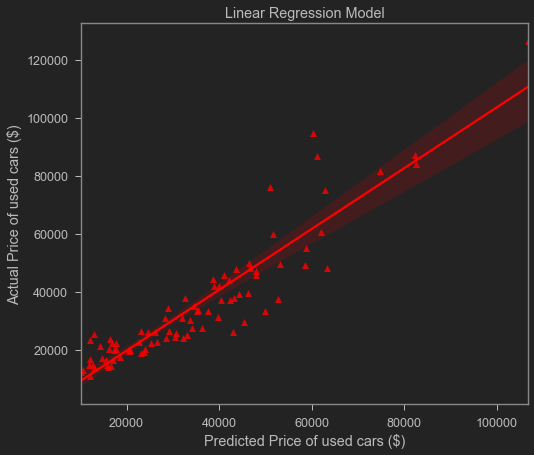

In [204]:
y_predict_lr = LR_Model.predict(X_test)

fig = sns.regplot(x=y_predict_lr, y=y_test, color='red', marker='^')
fig.set(title="Linear Regression Model", xlabel = 'Predicted Price of used cars ($)', ylabel='Actual Price of used cars ($)')

In [205]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict_lr)),'.3f'))
MSE = mean_squared_error(y_test,y_predict_lr)
MAE = mean_absolute_error(y_test,y_predict_lr)
r2 = r2_score(y_test,y_predict_lr)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =',r2)

RMSE = 8324.159 
MSE = 69291622.3419719 
MAE = 5660.19305497367 
r2 = 0.8481180586789316


[Text(0.5, 1.0, 'Decision Model'),
 Text(0.5, 0, 'Predicted Price of used cars ($)'),
 Text(0, 0.5, 'Actual Price of used cars ($)')]

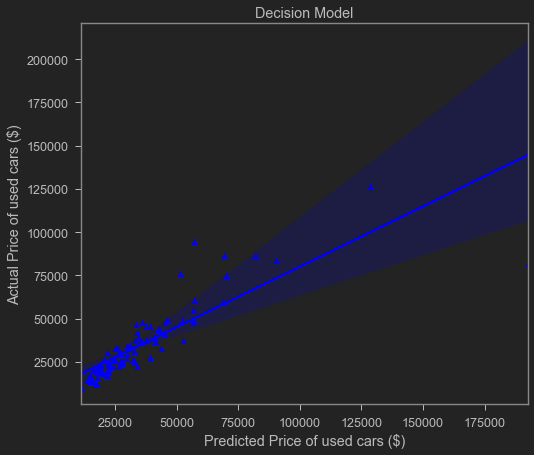

In [206]:
y_predict_dt = DT_Model.predict(X_test)

fig = sns.regplot(x=y_predict_dt, y=y_test, color='blue', marker='^')
fig.set(title="Decision Model", xlabel = 'Predicted Price of used cars ($)', ylabel='Actual Price of used cars ($)')

In [207]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict_dt)),'.3f'))
MSE = mean_squared_error(y_test,y_predict_dt)
MAE = mean_absolute_error(y_test,y_predict_dt)
r2 = r2_score(y_test,y_predict_dt)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =',r2)

RMSE = 13963.163 
MSE = 194969911.04651162 
MAE = 5960.558139534884 
r2 = 0.572640853423876


[Text(0.5, 1.0, 'Random Forest Model'),
 Text(0.5, 0, 'Predicted Price of used cars ($)'),
 Text(0, 0.5, 'Actual Price of used cars ($)')]

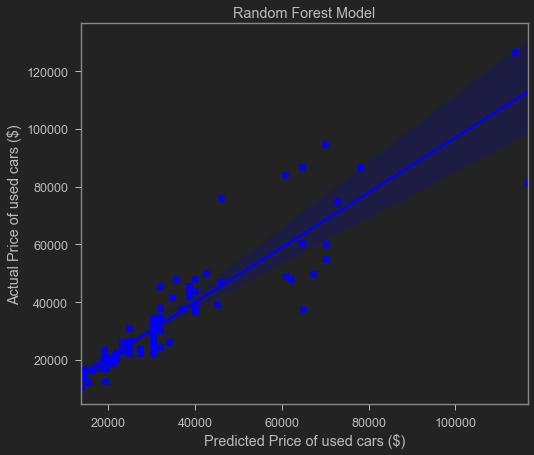

In [208]:
y_predict_RF = RF_Model.predict(X_test)

fig = sns.regplot(x=y_predict_RF, y=y_test, color='blue', marker='s')
fig.set(title="Random Forest Model", xlabel = 'Predicted Price of used cars ($)', ylabel='Actual Price of used cars ($)')

In [209]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict_RF)),'.3f'))
MSE = mean_squared_error(y_test,y_predict_RF)
MAE = mean_absolute_error(y_test,y_predict_RF)
r2 = r2_score(y_test,y_predict_RF)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =',r2)

RMSE = 9080.045 
MSE = 82447223.0231959 
MAE = 5640.156800793965 
r2 = 0.8192819872582345


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of used cars ($)'),
 Text(0, 0.5, 'Actual Price of used cars ($)')]

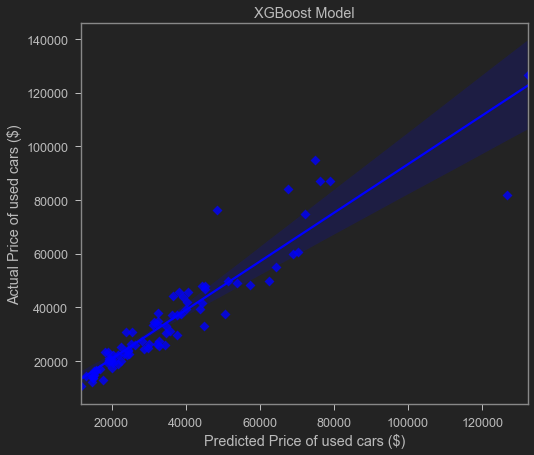

In [210]:
y_predict_XGB = XGB_Model.predict(X_test)

fig = sns.regplot(x=y_predict_XGB, y=y_test, color='blue', marker='D')
fig.set(title="XGBoost Model", xlabel = 'Predicted Price of used cars ($)', ylabel='Actual Price of used cars ($)')

In [211]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict_XGB)),'.3f'))
MSE = mean_squared_error(y_test,y_predict_XGB)
MAE = mean_absolute_error(y_test,y_predict_XGB)
r2 = r2_score(y_test,y_predict_XGB)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nr2 =',r2)

RMSE = 7889.051 
MSE = 62237125.29403807 
MAE = 4650.085699037064 
r2 = 0.8635809771454102
